In [4]:
import os
import sys


In [5]:
# Add the path to the directory containing your project to the Python path
project_path = '/home/ted/Desktop/DEV/telecom-user-behavior-analysis'
sys.path.append(project_path)

In [6]:
import pandas as pd
from DB_connection.connection import PostgresConnection
from src.utils import missing_values_table, convert_bytes_to_megabytes

Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [7]:
# Change the current working directory to the project directory
os.chdir(project_path)

In [8]:
# Connect to the PostgreSQL database
db = PostgresConnection(dbname='postgres_db', user='postgres_username', password='postgres_password')
db.connect()

# Execute query to retrieve data
query = "SELECT * FROM xdr_data"
result = db.execute_query(query)

# Convert result to Pandas DataFrame
df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
print(df.head())  # Display the first few rows of the DataFrame

# Close the database connection
db.close_connection()

Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [9]:
# Perform initial data analysis
missing_values_df = missing_values_table(df)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [10]:
df['HTTP DL (MB)'] = convert_bytes_to_megabytes(df, 'HTTP DL (Bytes)')

print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  9.16456699548519E+015  ...           2501332.0           8198936.0   
1                L77566A  ...          19111729.0          18338413.0   

In [11]:
print(df.columns)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [13]:
#Task 1.1 


# Group the data by user identifier
user_grouped = df.groupby('IMSI')

# Calculate the number of xDR sessions for each user
user_sessions = user_grouped.size().reset_index(name='NumSessions')

# Compute the total session duration for each user
user_session_duration = user_grouped['Dur. (ms)'].sum().reset_index(name='TotalSessionDuration')

# Sum the download (DL) and upload (UL) data for each user
user_data_usage = user_grouped[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().reset_index()

# Merge the dataframes to get the total data volume for each user
user_data_volume = pd.merge(user_session_duration, user_data_usage, on='IMSI')

# Calculate the total data volume (in bytes) during each session for each application
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
for app in applications:
    app_dl_col = f'{app} DL (Bytes)'
    app_ul_col = f'{app} UL (Bytes)'
    user_data_volume[app] = user_grouped[app_dl_col].fillna(0) + user_grouped[app_ul_col].fillna(0)

# Print the aggregated data
print(user_data_volume.head())




/tmp/ipykernel_75841/1521528004.py:24: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  user_data_volume[app] = user_grouped[app_dl_col].fillna(0) + user_grouped[app_ul_col].fillna(0)
/tmp/ipykernel_75841/1521528004.py:24: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  user_data_volume[app] = user_grouped[app_dl_col].fillna(0) + user_grouped[app_ul_col].fillna(0)
/tmp/ipykernel_75841/1521528004.py:24: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna inste

           IMSI  TotalSessionDuration  Total DL (Bytes)  Total UL (Bytes)  \
0  2.040471e+14              869844.0        78697597.0        60456049.0   
1  2.040808e+14              877385.0       194828056.0        37295915.0   
2  2.082001e+14               86019.0        31376981.0        53794658.0   
3  2.082001e+14               86254.0       392918313.0        33583272.0   
4  2.082001e+14              573923.0       961767023.0        71325004.0   

   Social Media      Google      Email     Youtube     Netflix       Gaming  \
0     2277485.0   8532589.0   571586.0  32043647.0  11043025.0  244020225.0   
1     2467548.0   3546628.0  3460641.0  39856019.0  27371860.0  349153245.0   
2     3377527.0  12018549.0  2494235.0  16053073.0  25875355.0  451252611.0   
3     2799611.0   4820358.0  2740562.0  41635931.0  19525070.0  536497558.0   
4     3079927.0   3729828.0  1752891.0  38578102.0  30902183.0  772888732.0   

         Other  
0  176134927.0  
1   76740096.0  
2  31208151

In [14]:
#Task 1.2
#Basic Metrics Analysis


# Numeric Variables
numeric_variables = ['Bearer Id', 'Dur. (ms)', 'Start ms', 'End ms', 'IMSI', 
                     'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
                     'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 
                     'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 
                     'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', 
                     '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 
                     'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', 
                     '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 
                     'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 
                     'Activity Duration UL (ms)', 'Nb of sec with 125000B < Vol DL', 
                     'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 
                     'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 
                     'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 
                     'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
                     'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                     'Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                     'Other DL (Bytes)', 'Other UL (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)']

# Calculate basic metrics for numeric variables
numeric_metrics = df[numeric_variables].describe().transpose()

# Categorical Variables
categorical_variables = ['Last Location Name', 'Handset Manufacturer', 'Handset Type']

# Count unique values for categorical variables
categorical_counts = df[categorical_variables].nunique()

# Print the results
print("Numeric Variables Basic Metrics:")
print(numeric_metrics)
print("\nCategorical Variables Unique Value Counts:")
print(categorical_counts)



Numeric Variables Basic Metrics:
                                             count          mean  \
Bearer Id                                 149010.0  1.013887e+19   
Dur. (ms)                                 150000.0  1.046086e+05   
Start ms                                  150000.0  4.991882e+02   
End ms                                    150000.0  4.988009e+02   
IMSI                                      149431.0  2.082016e+14   
MSISDN/Number                             148935.0  4.188282e+10   
IMEI                                      149429.0  4.847455e+13   
Avg RTT DL (ms)                           122172.0  1.097957e+02   
Avg RTT UL (ms)                           122189.0  1.766288e+01   
Avg Bearer TP DL (kbps)                   150000.0  1.330005e+04   
Avg Bearer TP UL (kbps)                   150000.0  1.770429e+03   
TCP DL Retrans. Vol (Bytes)                61855.0  2.080991e+07   
TCP UL Retrans. Vol (Bytes)                53352.0  7.596587e+05   
DL TP < 50 Kbps

In [15]:
#Non-Graphical Univariate Analysis

# Calculate dispersion parameters for numeric variables
numeric_dispersion = df[numeric_variables].agg(['var', 'min', 'max', 'quantile', 'std']).transpose()

# Display the dispersion parameters
print("Dispersion Parameters for Numeric Variables:")
print(numeric_dispersion)


Dispersion Parameters for Numeric Variables:
                                                   var           min  \
Bearer Id                                 8.370447e+36  6.917538e+18   
Dur. (ms)                                 6.567096e+09  7.142000e+03   
Start ms                                  8.329679e+04  0.000000e+00   
End ms                                    8.300026e+04  0.000000e+00   
IMSI                                      4.617380e+20  2.040471e+14   
MSISDN/Number                             5.989979e+24  3.360100e+10   
IMEI                                      5.024937e+26  4.400152e+11   
Avg RTT DL (ms)                           3.841306e+05  0.000000e+00   
Avg RTT UL (ms)                           7.189942e+03  0.000000e+00   
Avg Bearer TP DL (kbps)                   5.746510e+08  0.000000e+00   
Avg Bearer TP UL (kbps)                   2.139391e+07  0.000000e+00   
TCP DL Retrans. Vol (Bytes)               3.333054e+16  2.000000e+00   
TCP UL Retrans. Vol

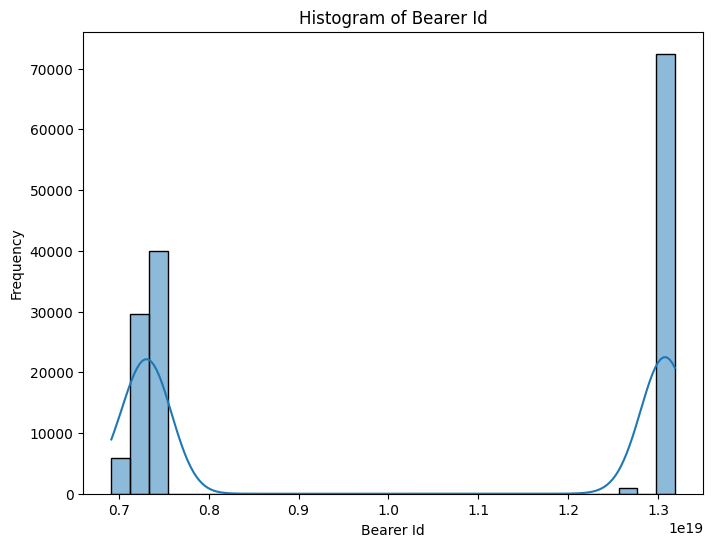

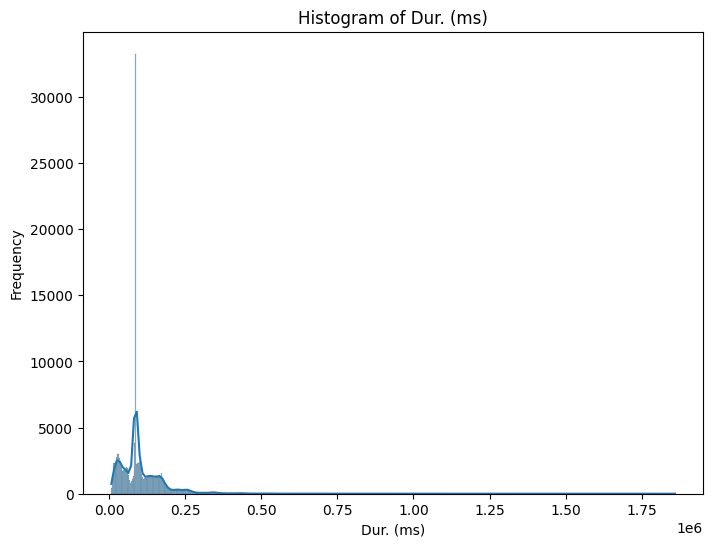

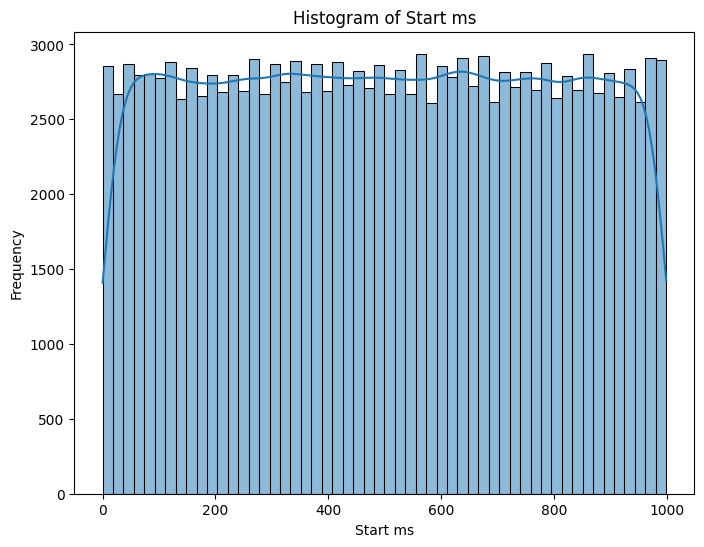

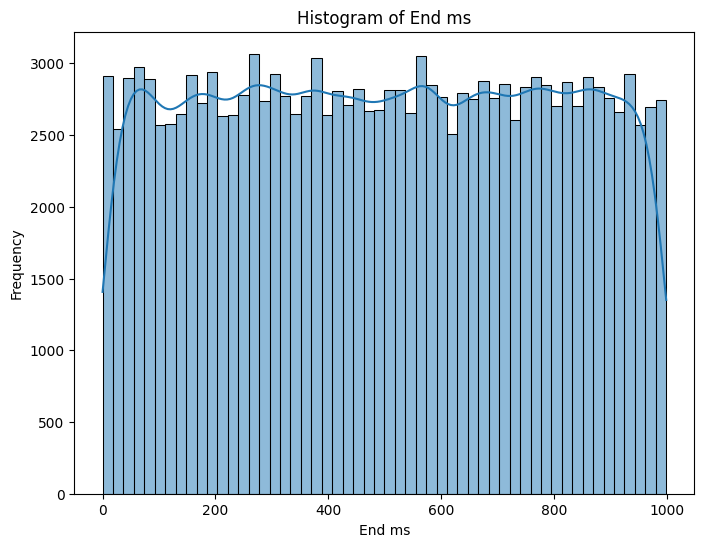

In [15]:
#Graphical Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for Numeric Variables
for var in numeric_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var].dropna(), kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Bar Charts for Categorical Variables
for var in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=var, data=df, order=df[var].value_counts().index)
    plt.title(f'Count Plot of {var}')
    plt.xlabel('Count')
    plt.ylabel(var)
    plt.show()

# Box Plots for Numeric Variables
for var in numeric_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[var])
    plt.title(f'Box Plot of {var}')
    plt.ylabel(var)
    plt.show()




/home/ted/Desktop/DEV/telecom-user-behavior-analysis/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


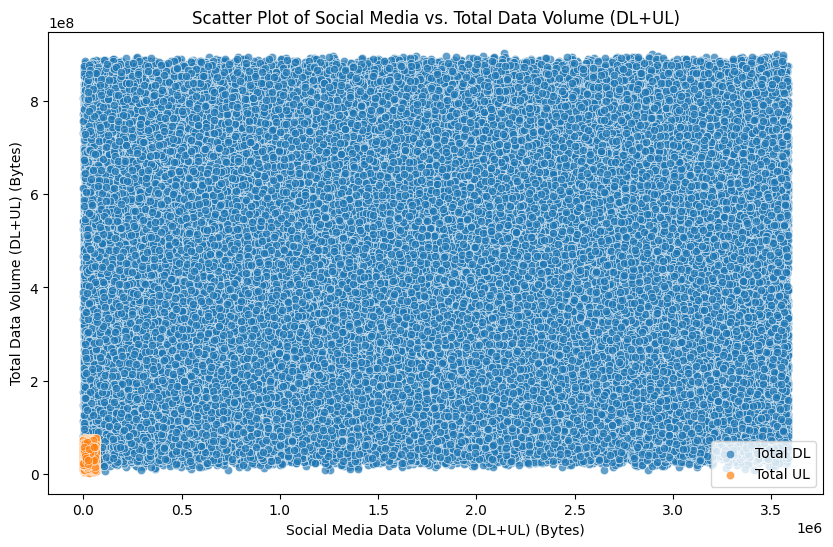

/home/ted/Desktop/DEV/telecom-user-behavior-analysis/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


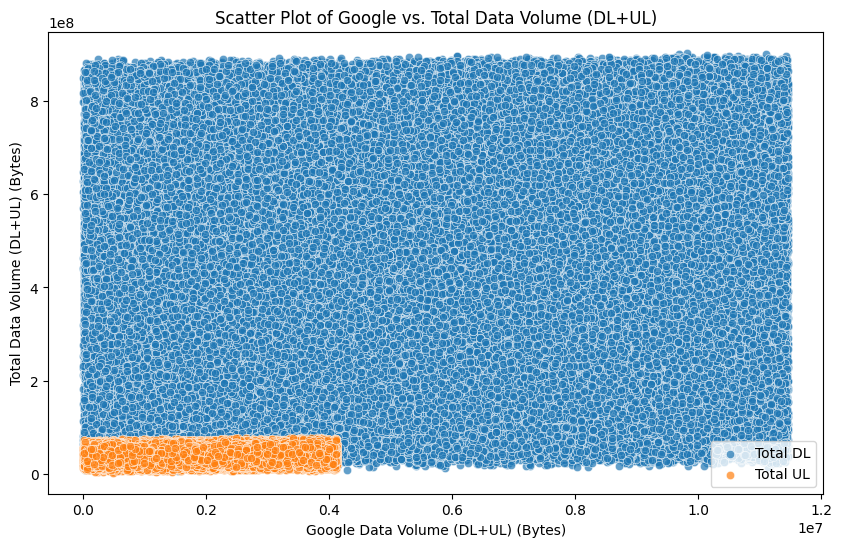

/home/ted/Desktop/DEV/telecom-user-behavior-analysis/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


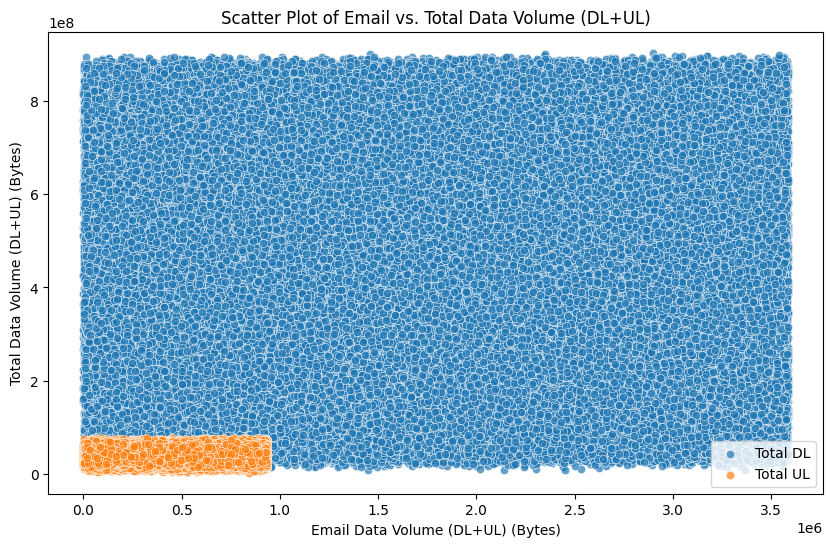

/home/ted/Desktop/DEV/telecom-user-behavior-analysis/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


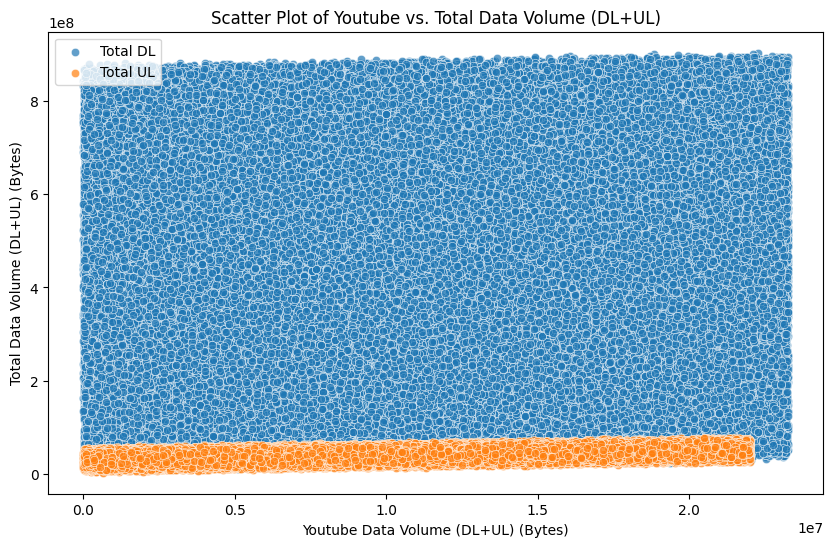

/home/ted/Desktop/DEV/telecom-user-behavior-analysis/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


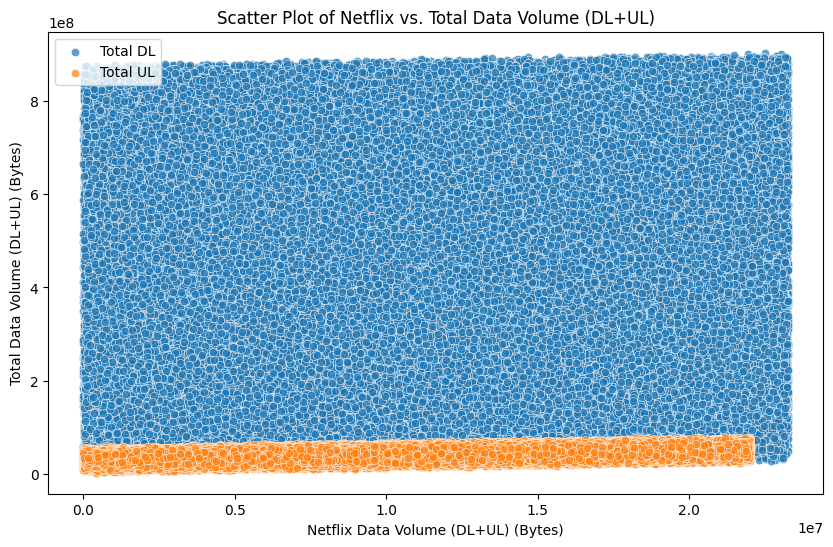

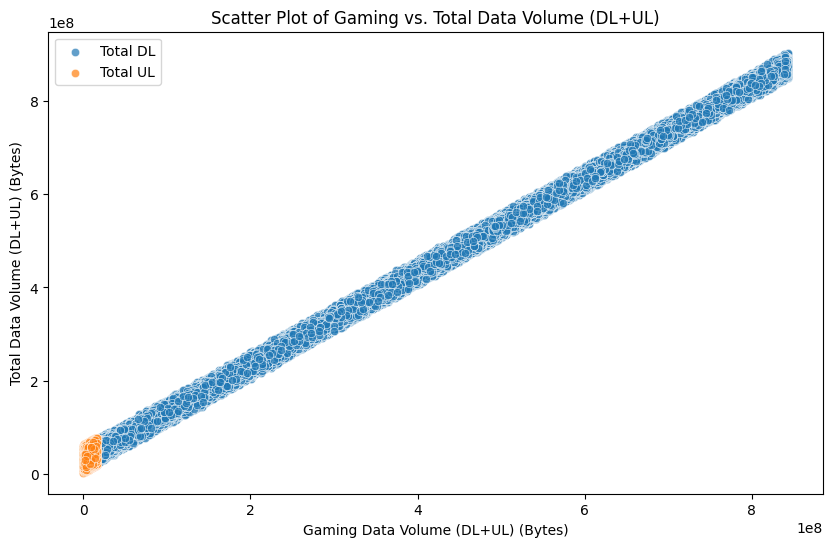

/home/ted/Desktop/DEV/telecom-user-behavior-analysis/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


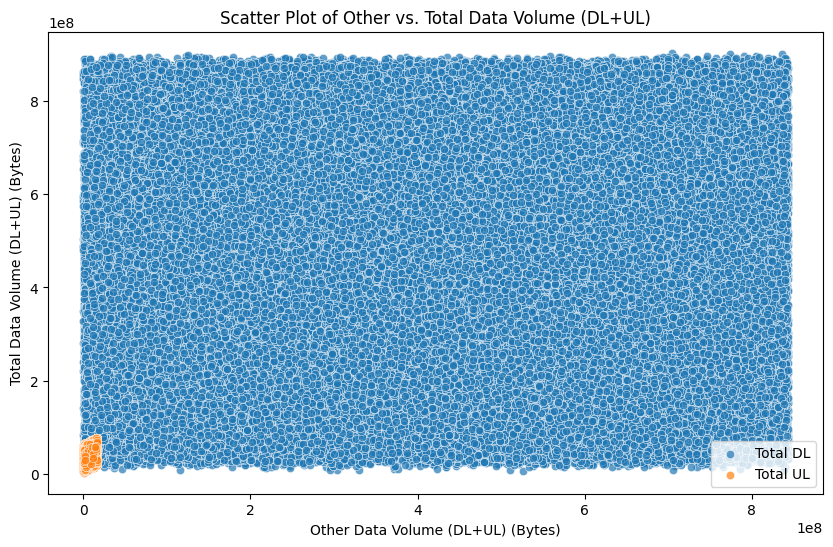

In [19]:
# Bivariate Analysis: Scatter Plots or Heatmaps
import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate Analysis: Scatter Plots or Heatmaps
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

for app in applications:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=app + ' DL (Bytes)', y='Total DL (Bytes)', data=df, label='Total DL', alpha=0.7)
    sns.scatterplot(x=app + ' UL (Bytes)', y='Total UL (Bytes)', data=df, label='Total UL', alpha=0.7)
    plt.title(f'Scatter Plot of {app} vs. Total Data Volume (DL+UL)')
    plt.xlabel(f'{app} Data Volume (DL+UL) (Bytes)')
    plt.ylabel('Total Data Volume (DL+UL) (Bytes)')
    plt.legend()
    plt.show()




In [23]:
#Variable Transformations
# Step 1: Calculate the total duration for all sessions for each user
user_total_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].transform('sum')

# Step 2: Segment users into deciles based on their total session duration
user_deciles = pd.qcut(user_total_duration, q=10, labels=False, duplicates='drop')

# Step 3: Compute the total data (DL+UL) for each decile class
user_data_per_decile = df.groupby(user_deciles)[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

# Step 4: Analyze the distribution of total data (DL+UL) per decile class
print("\nTotal Data (DL+UL) per Decile Class:")
print(user_data_per_decile)





Total Data (DL+UL) per Decile Class:
           Total DL (Bytes)  Total UL (Bytes)
Dur. (ms)                                    
0.0            6.770069e+12      6.116083e+11
1.0            6.770024e+12      6.128390e+11
2.0            7.655990e+12      6.915050e+11
3.0            5.915369e+12      5.355190e+11
4.0            6.770929e+12      6.127066e+11
5.0            7.675472e+12      6.915521e+11
6.0            5.880200e+12      5.335680e+11
7.0            6.776749e+12      6.111766e+11
8.0            6.747934e+12      6.135883e+11
9.0            6.746856e+12      6.097927e+11


In [24]:
#Correlation analysis
# Select the columns for correlation analysis
correlation_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                       'Google DL (Bytes)', 'Google UL (Bytes)',
                       'Email DL (Bytes)', 'Email UL (Bytes)',
                       'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                       'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                       'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                       'Other DL (Bytes)', 'Other UL (Bytes)']

# Compute the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                -0.000555   
Social Media UL (Bytes)                -0.000555                 1.000000   
Google DL (Bytes)                      -0.001954                 0.003542   
Google UL (Bytes)                       0.000186                 0.001085   
Email DL (Bytes)                        0.004745                 0.004823   
Email UL (Bytes)                       -0.002518                -0.001427   
Youtube DL (Bytes)                     -0.001389                -0.001786   
Youtube UL (Bytes)                      0.002345                -0.002368   
Netflix DL (Bytes)                     -0.001817                -0.000772   
Netflix UL (Bytes)                      0.003457                -0.002493   
Gaming DL (Bytes)                       0.001018                 0.000210   
Gaming UL (Bytes)                       0.003095        

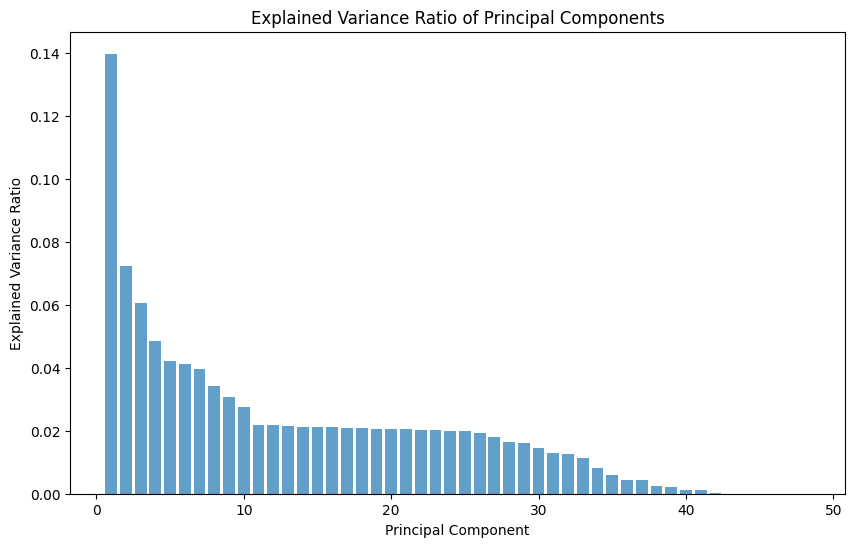

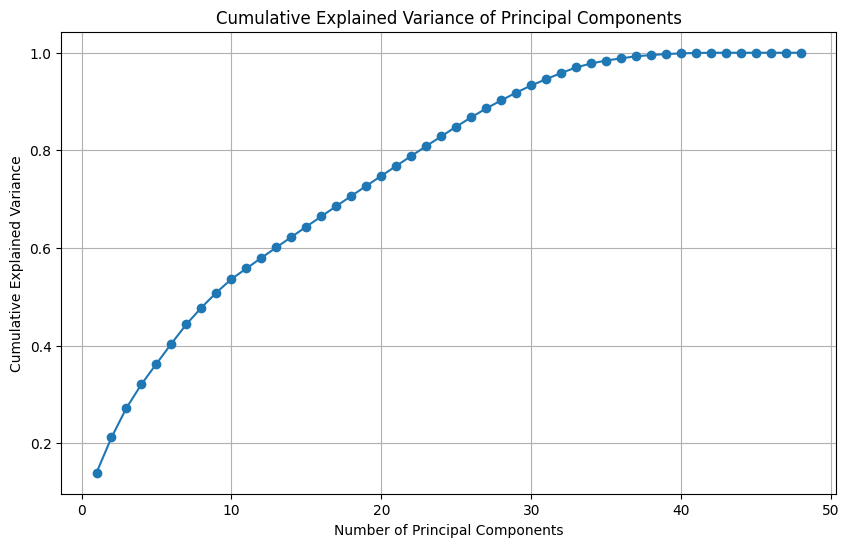

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Drop columns that are not suitable for PCA
pca_data = df.drop(columns=['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Last Location Name', 
                             'Handset Manufacturer', 'Handset Type'])

# Drop rows with missing values
pca_data.dropna(inplace=True)

# Standardize the data
pca_data_standardized = (pca_data - pca_data.mean()) / pca_data.std()

# Fit PCA
pca = PCA()
pca.fit(pca_data_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance of Principal Components')
plt.grid(True)
plt.show()
